# Clustering - Spotify Music Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2022/main/data/music_genres.csv')
df

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,1,zolo,0.222625,0.547082,2.580991e+05,0.610240,0.143872,0.204206,-11.295878,0.061088,125.494919,0.596155,33.778943,9
2969,0,zouglou,0.161000,0.863000,2.063200e+05,0.909000,0.000000,0.108000,-5.985000,0.081300,119.038000,0.845000,58.000000,7
2970,1,zouk,0.263261,0.748889,3.060728e+05,0.622444,0.257227,0.089678,-10.289222,0.038778,101.965222,0.824111,46.666667,5
2971,0,zurich indie,0.993000,0.705667,1.984173e+05,0.172667,0.468633,0.179667,-11.453333,0.348667,91.278000,0.739000,0.000000,7


# **Data Inspection**

In [ ]:
#To see if there are any null values in the whole dataset
df.isnull().any().any()

False

In [ ]:
#To see inspect information about the dataframe such as datatypes for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


In [ ]:
#To inpesct mathematical information about each column in the dataframe
df.describe()

,mode,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
count,2973.000000,2973.000000,2973.000000,2.973000e+03,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000
mean,0.833165,0.401241,0.537187,2.517209e+05,0.561143,0.211366,0.192800,-10.509848,0.083588,119.018723,0.492748,39.919185,5.938782
std,0.372891,0.319760,0.150668,9.465686e+04,0.234486,0.267329,0.092356,5.369202,0.080483,17.469188,0.201820,16.748723,3.368110
min,0.000000,0.000003,0.056900,3.094600e+04,0.001002,0.000000,0.022200,-41.825000,0.023800,47.135722,0.003353,0.000000,0.000000
25%,1.000000,0.119050,0.441202,2.063788e+05,0.395058,0.004835,0.137687,-12.427656,0.044900,109.198143,0.348578,32.491279,3.000000
50%,1.000000,0.321745,0.546496,2.375453e+05,0.601195,0.080700,0.178764,-9.221817,0.059457,119.194167,0.500048,43.056569,7.000000
75%,1.000000,0.673991,0.647500,2.772720e+05,0.730127,0.343333,0.220856,-6.920125,0.091000,127.508750,0.640257,51.138889,9.000000
max,1.000000,0.996000,0.929000,2.382587e+06,0.994667,0.992000,0.960000,0.060000,0.946219,204.212000,0.980000,80.666667,11.000000


# **Data Preprocessing**

In [ ]:
#The genre column has alot of values '[]' therefore we need to further classify these values
df['genres'] = df['genres'].replace(['[]'], 'Unknown Genre')

# **Inspecting Most Popular Music Genres**

Text(9.435000000000002, 0.5, 'Popularity of Genre')

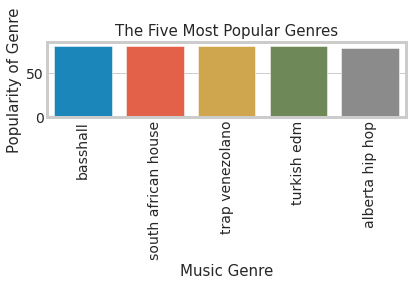

In [ ]:
#We create a barplot that shows the genres that are respective to the highest 5 popularity values

#We use the nlargest method to get the 5 highest popularities
sns.barplot(data = df.nlargest(5, 'popularity'), x = 'genres' , y = 'popularity', errwidth = 0)
plt.title ('The Five Most Popular Genres', size = 15)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.xlabel('Music Genre', size = 15)
plt.ylabel('Popularity of Genre', size = 15)

Therefore, by looking at the barplot we can see that the 5 most popular music genres are:
1. Basshall
2. South African House
3. Trap Venezolano
4. Turkish EDM
5. Alberta Hip Hop

# **Understanding What Factors Affect Popularity of a Song**

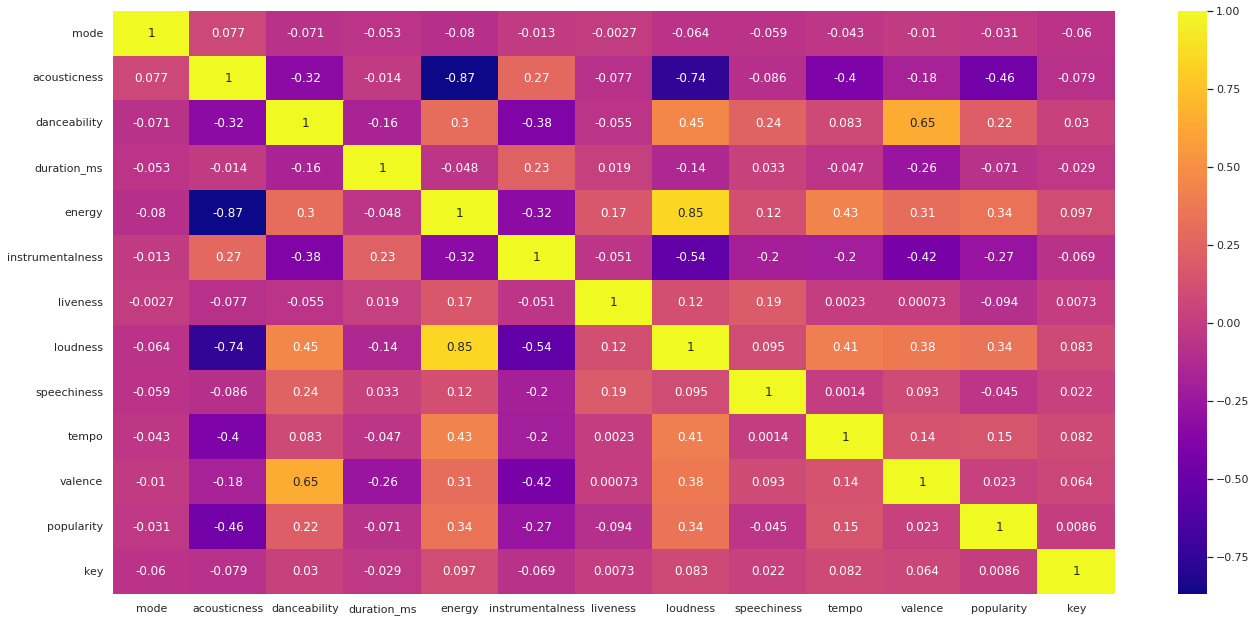

In [ ]:
#To answer this question we need to see the correlation of each column with popularity

#This can be done and seen in a heatmap
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(df.corr(), cmap='plasma', annot = True);

We can see that the factors that affect the popularity of a song are:
1. Energy (0.34) & Loudness (0.34) have the highest positive correlation
2. Speechiness (-0.045) & Duration (-0.071) have the highest negative correlation

In summary, we can say that the factors that affect the popularity of the song are: Energy & Loudness

# **To Inspect Most & Least Correlated Attributed**

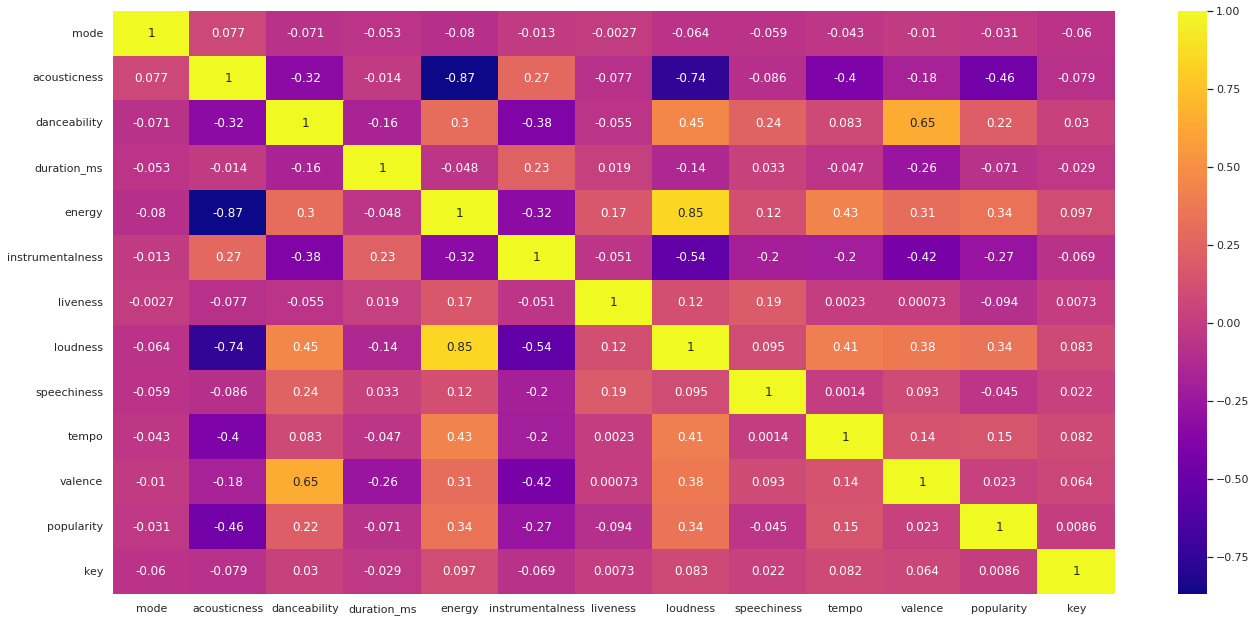

In [ ]:
#We can see correlation through creating a heatmap
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(df.corr(), cmap = 'plasma', annot = True);

We can see that the two pairs with the highest correlation are:

1. Energy & Acousticness (-0.87 - Negative Correlation)
2. Energy & Loudness (0.85 - Positive Correlation)

# **Inspecting Genres & Their Sub-Genres**

In [ ]:
pd.Series(np.concatenate([x.split() for x in df.genres])).value_counts()

pop           240
indie         237
rock          183
metal         132
classical     106
             ... 
go-go           1
glitchcore      1
glee            1
ghent           1
zydeco          1
Length: 1684, dtype: int64

In [ ]:
pd.Series(' '.join(df.genres).split()).value_counts()

pop           240
indie         237
rock          183
metal         132
classical     106
             ... 
go-go           1
glitchcore      1
glee            1
ghent           1
zydeco          1
Length: 1684, dtype: int64

The main genre categories that have the most sub-genres are:
1. Pop
2. Indie
3. Rock
4. Metal
5. Classical

# **Data Prepration for Modelling**

In [ ]:
df_model = df.copy()
df_model = df_model.drop(['genres'], axis =1)

In [ ]:
from sklearn.preprocessing import StandardScaler #Z-Score Normalization

scaled_data = StandardScaler().fit_transform(df_model)

scaled_data

array([[ 0.44748433,  1.80819676, -2.48471886, ..., -1.92760907,
        -0.72171978,  0.01817872],
       [ 0.44748433,  0.29257799, -1.57893122, ..., -1.34299618,
         0.7512771 , -0.27877364],
       [ 0.44748433,  1.12840682,  1.16044852, ...,  2.38991988,
         0.4825547 ,  0.31513108],
       ...,
       [ 0.44748433, -0.43158249,  1.40532576, ...,  1.6421528 ,
         0.40293325, -0.27877364],
       [-2.23471511,  1.85094428,  1.11840634, ...,  1.22036371,
        -2.38381762,  0.31513108],
       [ 0.44748433,  0.0619243 ,  0.61218797, ...,  1.56500441,
        -0.57669499,  0.31513108]])

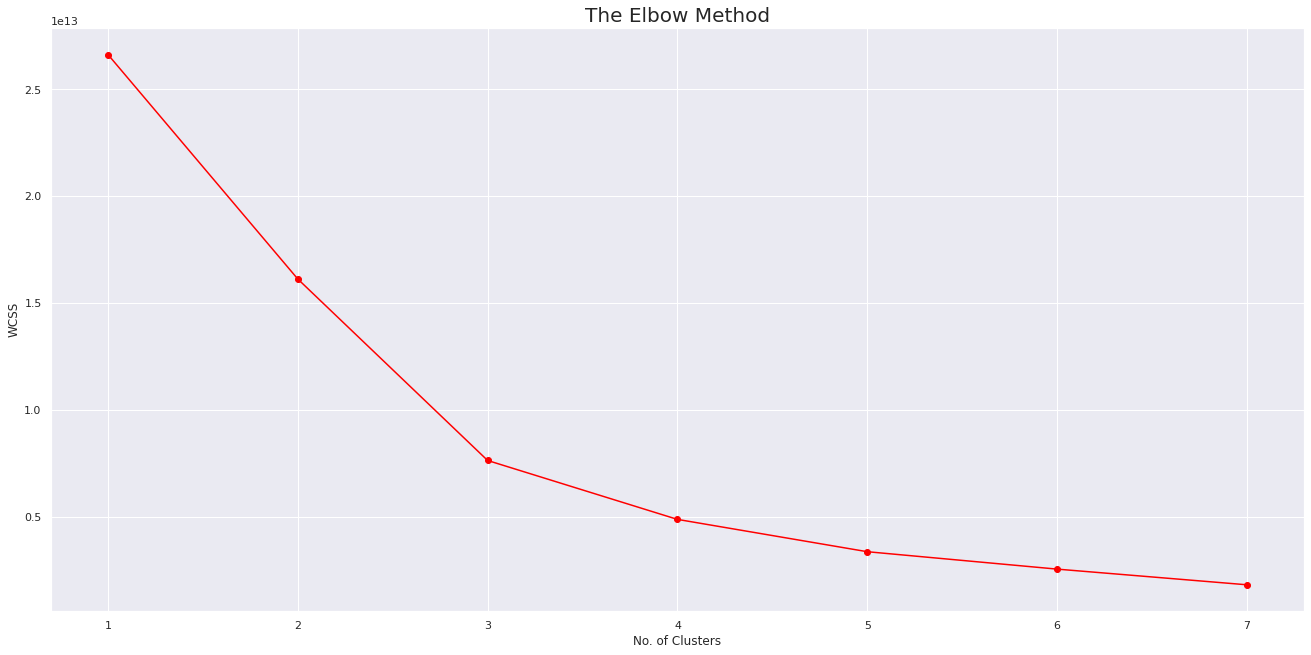

In [ ]:
#We then use the elbow method to find out how many clusters to split the dataframe
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 8):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(df_model)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 8), wcss, marker='o', color='red')
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

**As seen by the elbow method, four (4) clusters is the number to be used.**

# **Modelling (Clustering)**

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(scaled_data)

# As it's difficult to visualise clusters when the data is high-dimensional - we'll use
# boxplots to help us see how the clusters are grouping the samples

df_model["cluster"] = cluster_labels

# **Cluster Analysis & Visualization**

**Boxplot Visualization**

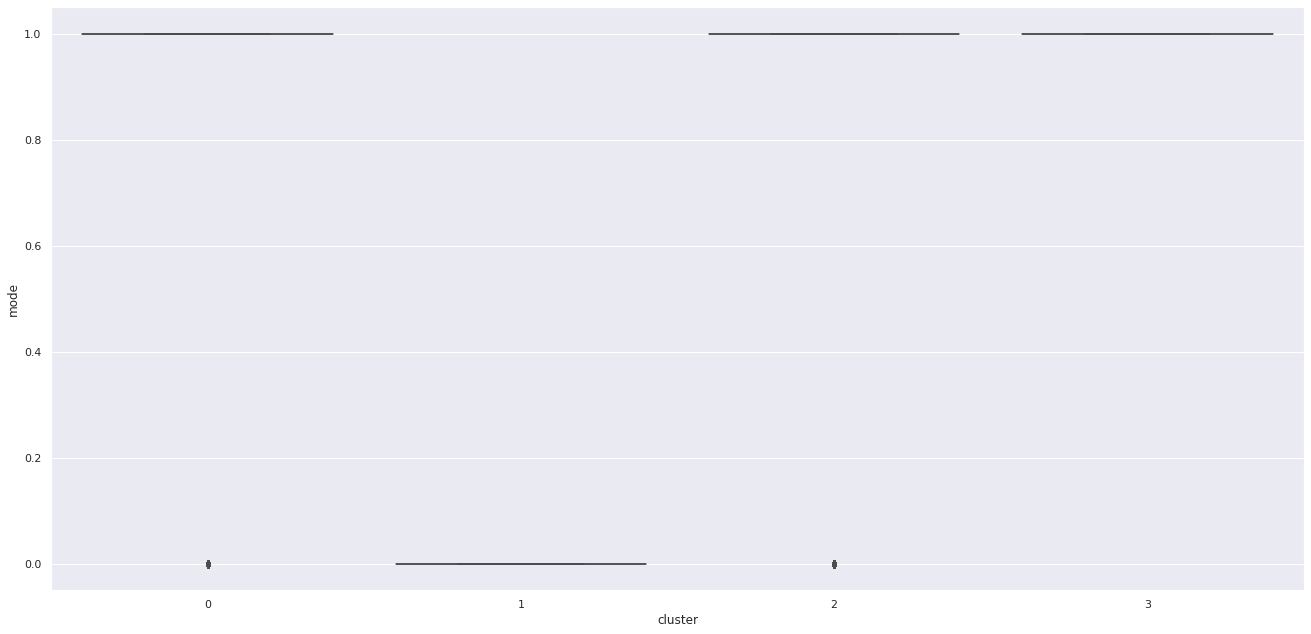

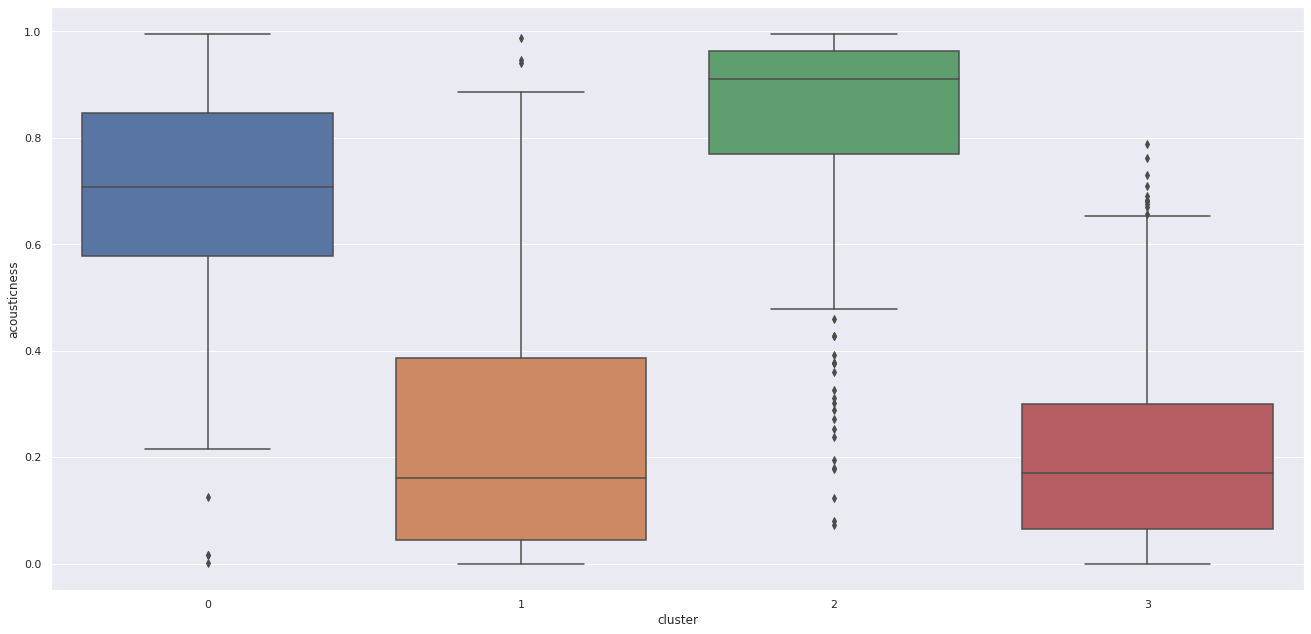

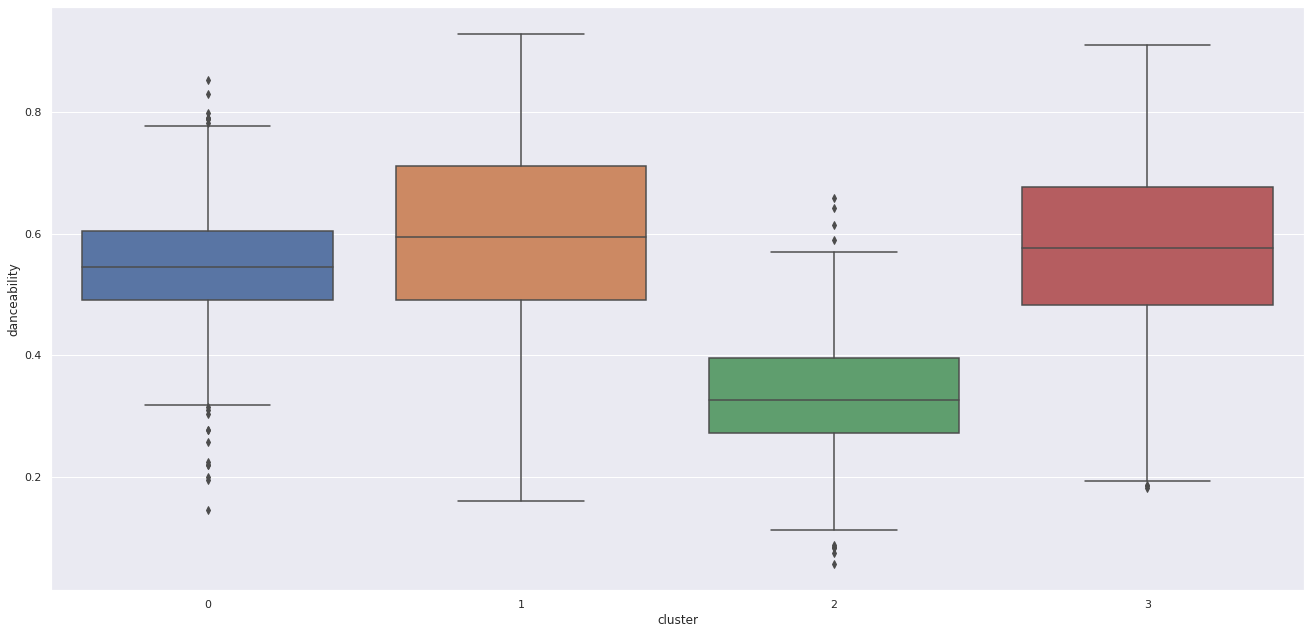

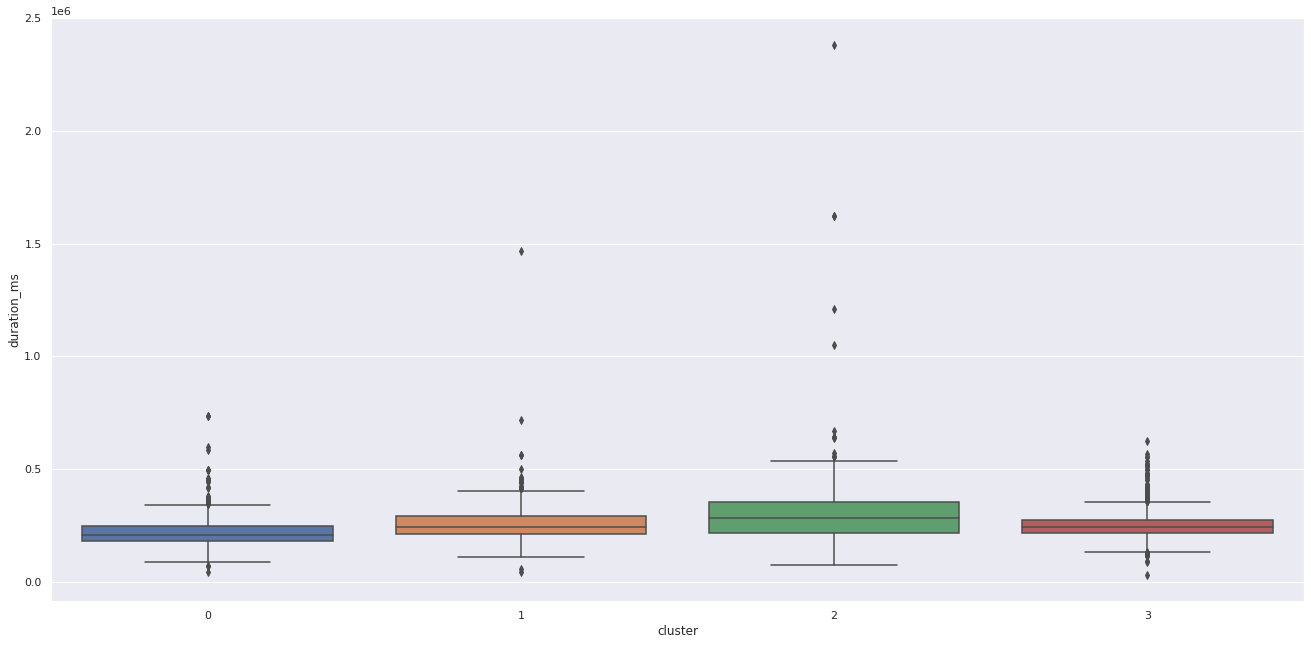

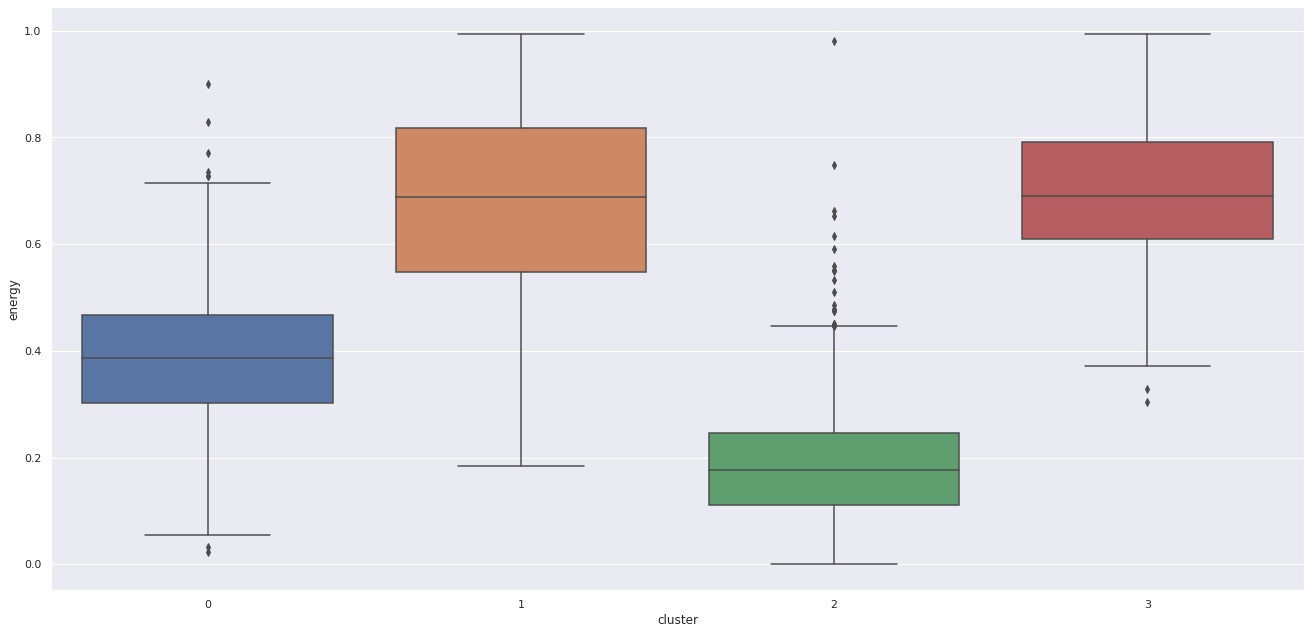

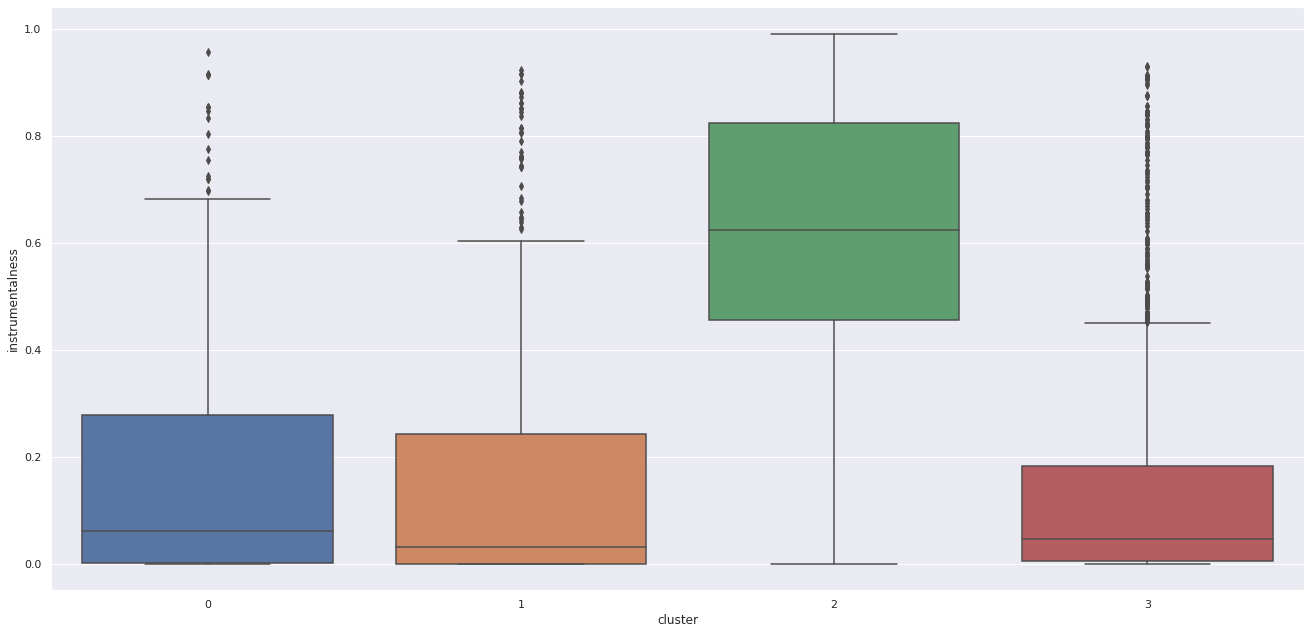

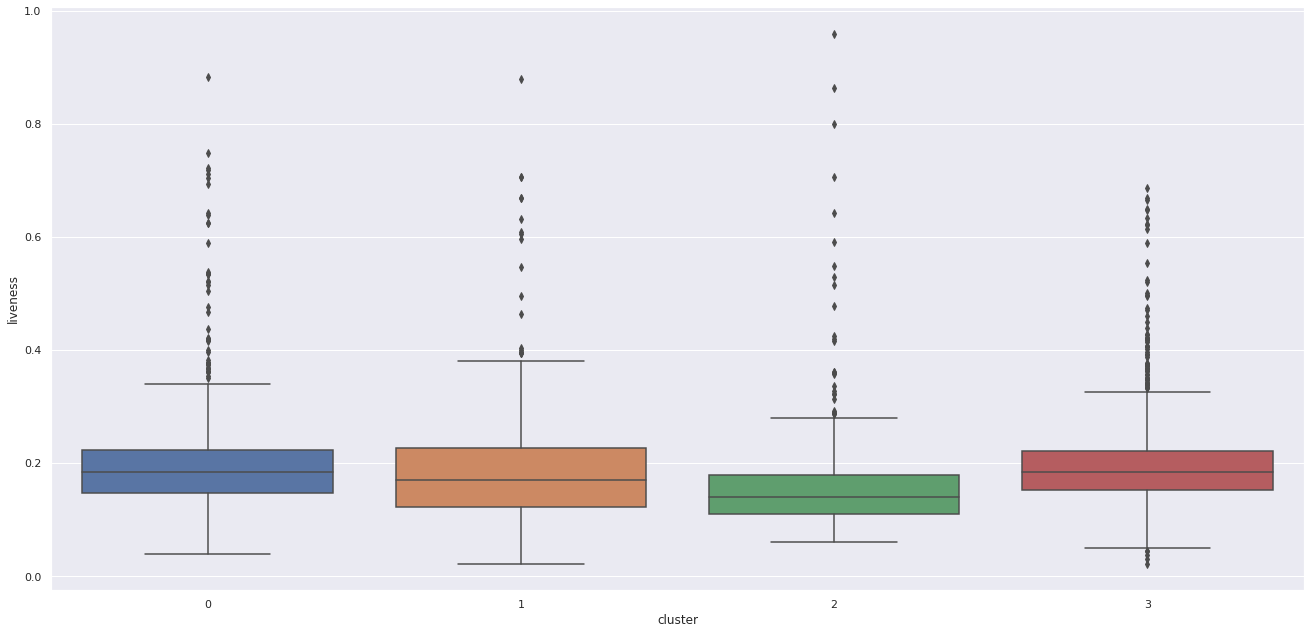

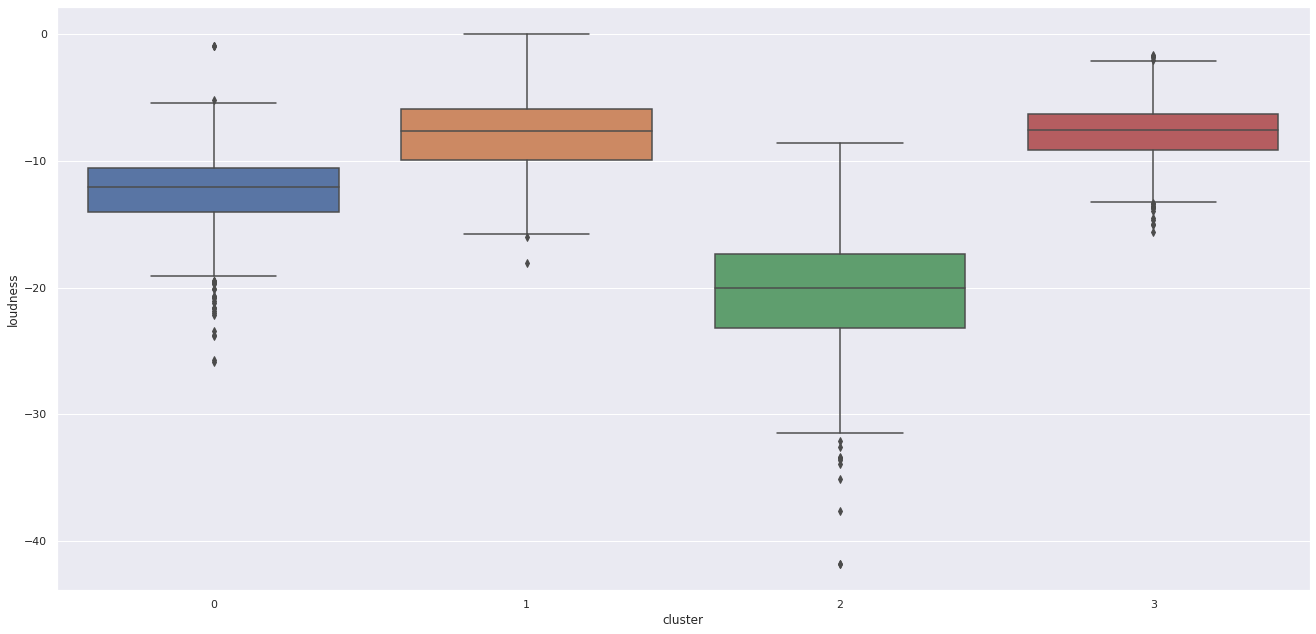

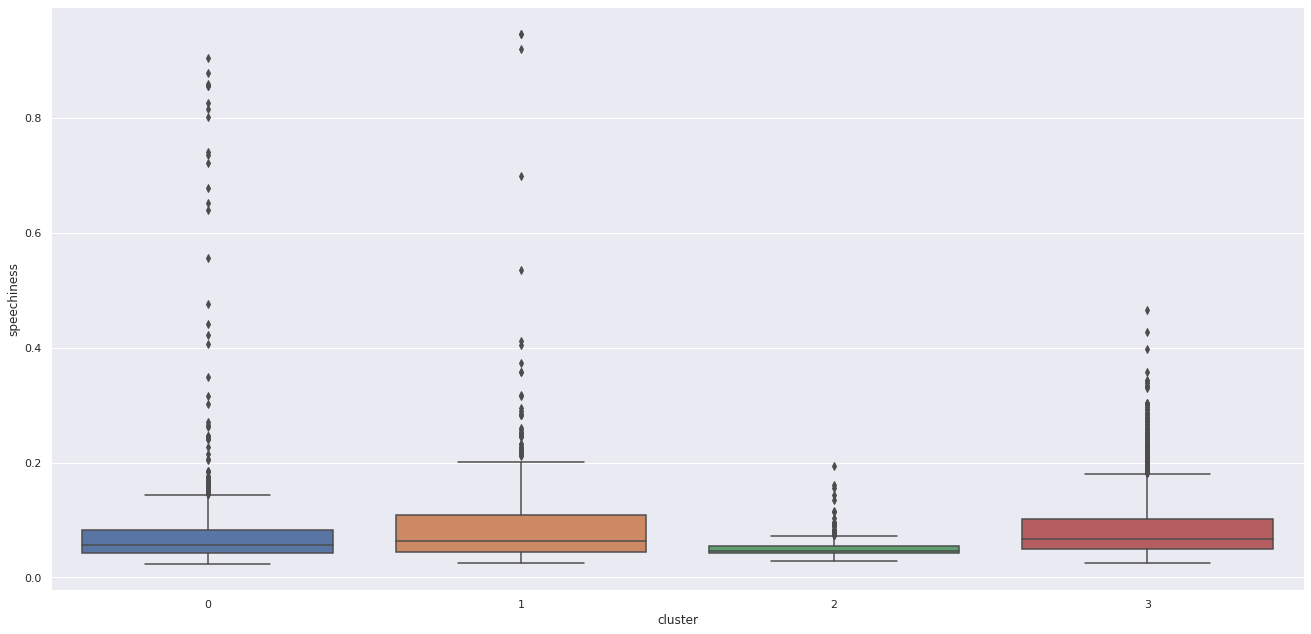

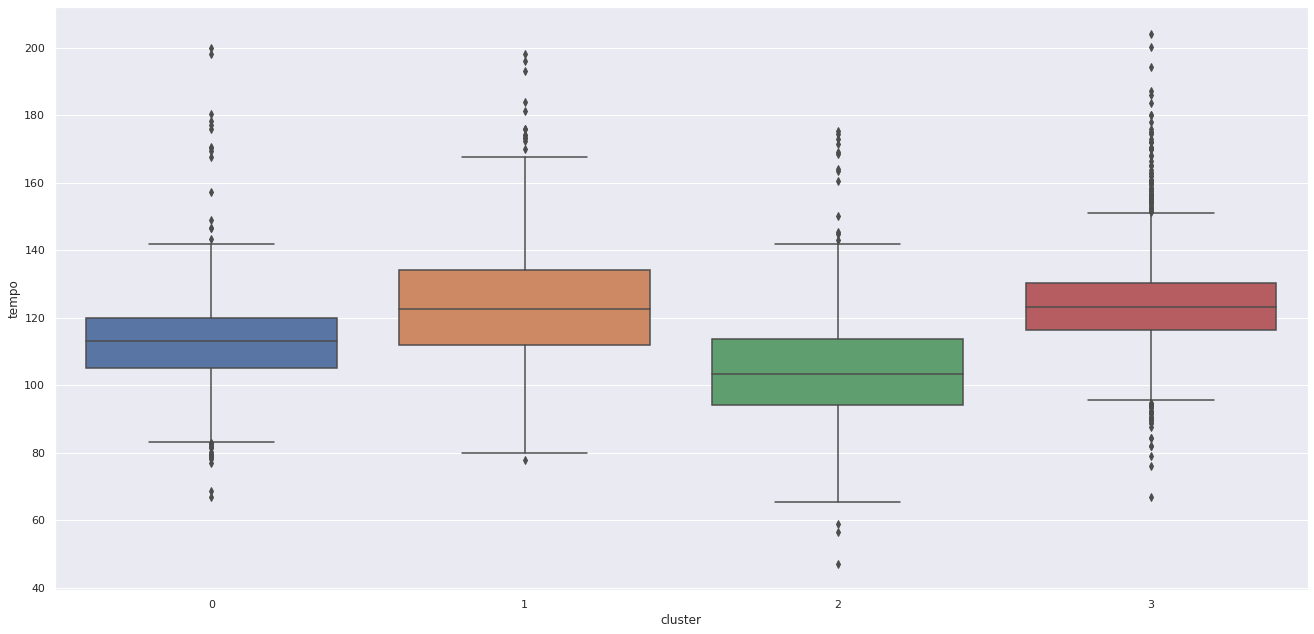

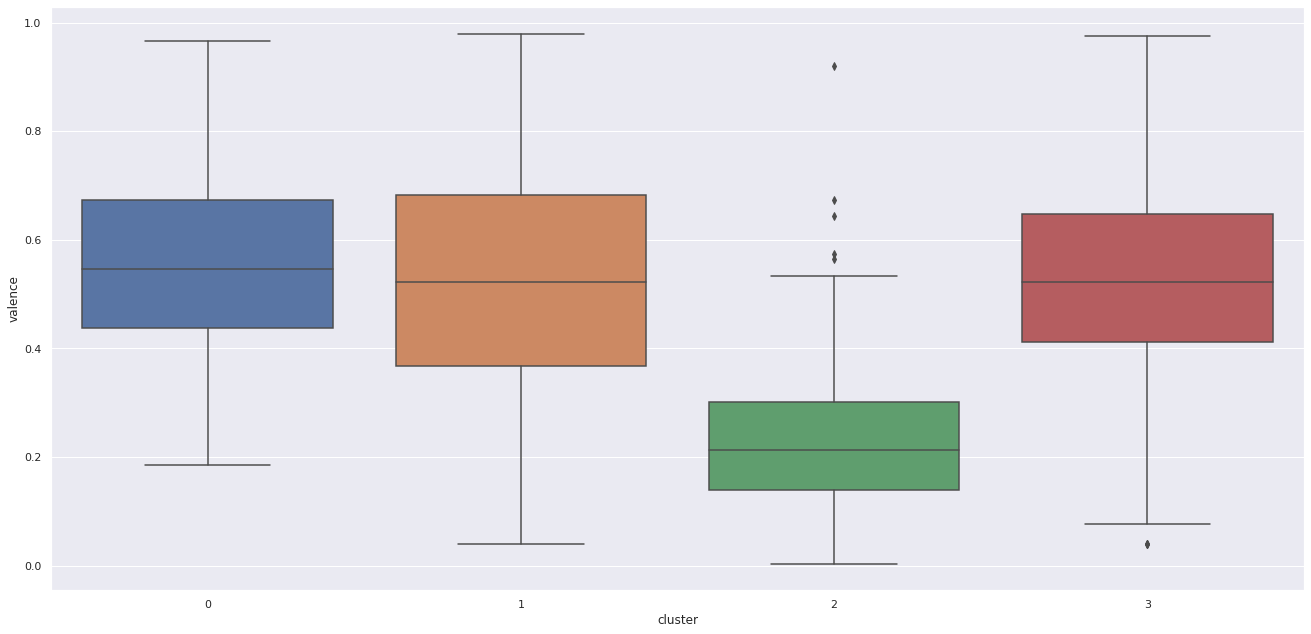

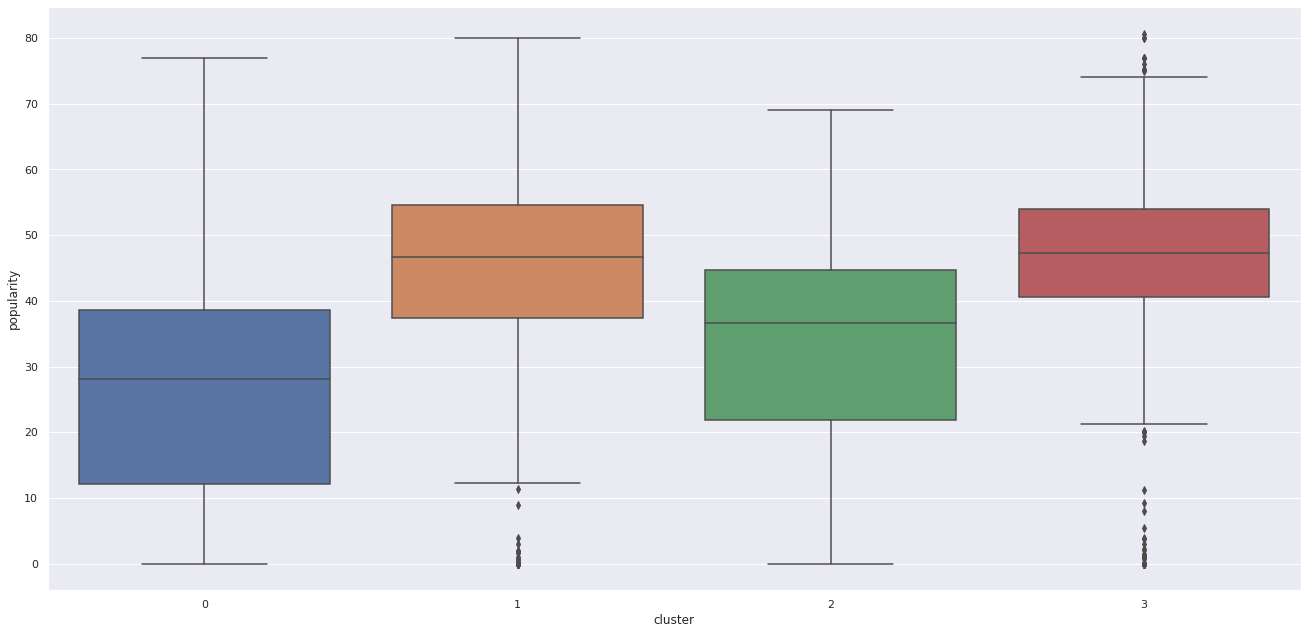

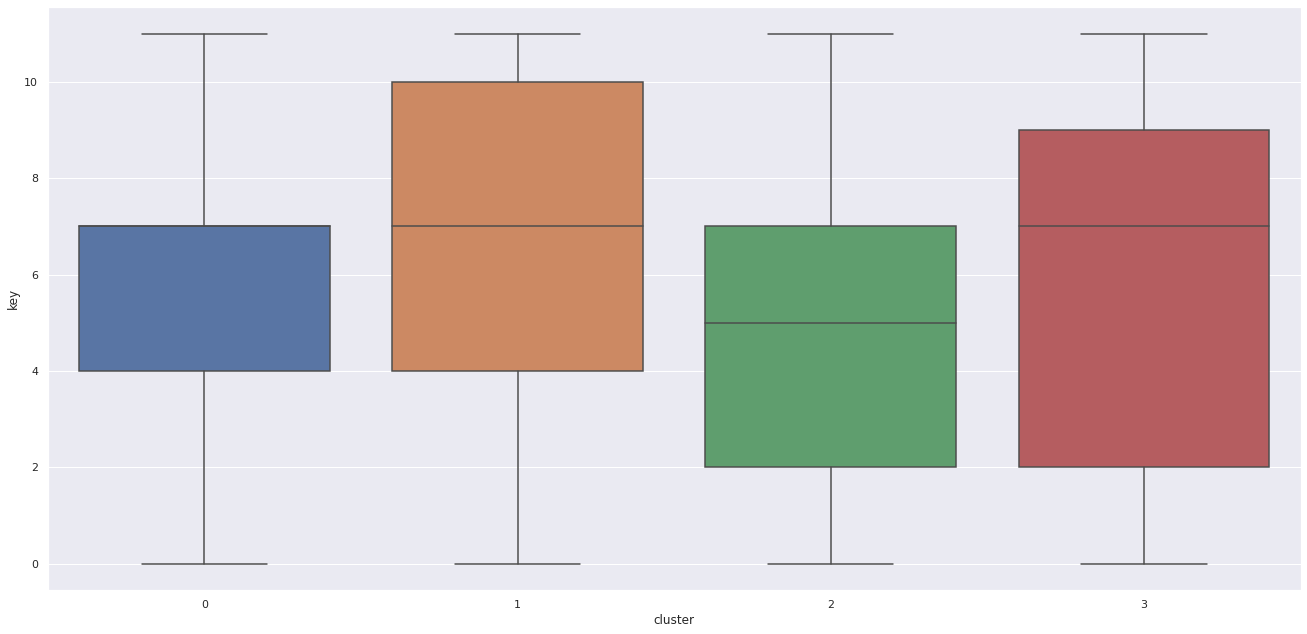

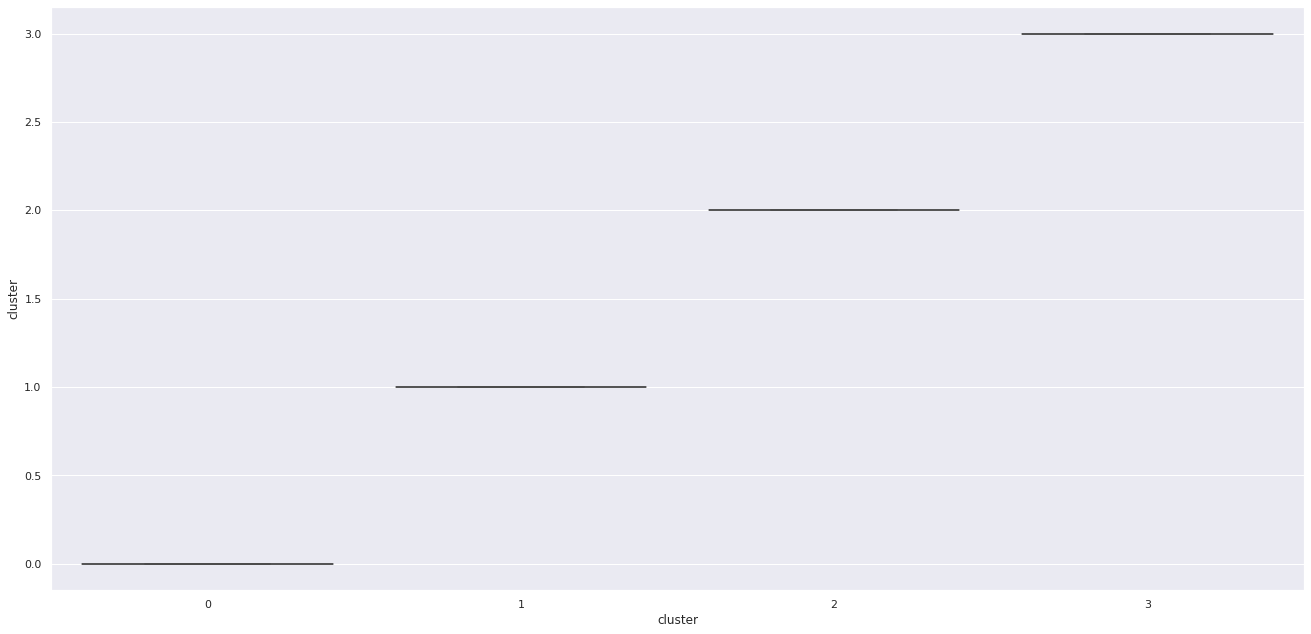

In [ ]:
for col in df_model.select_dtypes('number').columns:
    plt.figure()
    sns.boxplot(x='cluster', y=col, data=df_model)

**Pairplot Visualization**

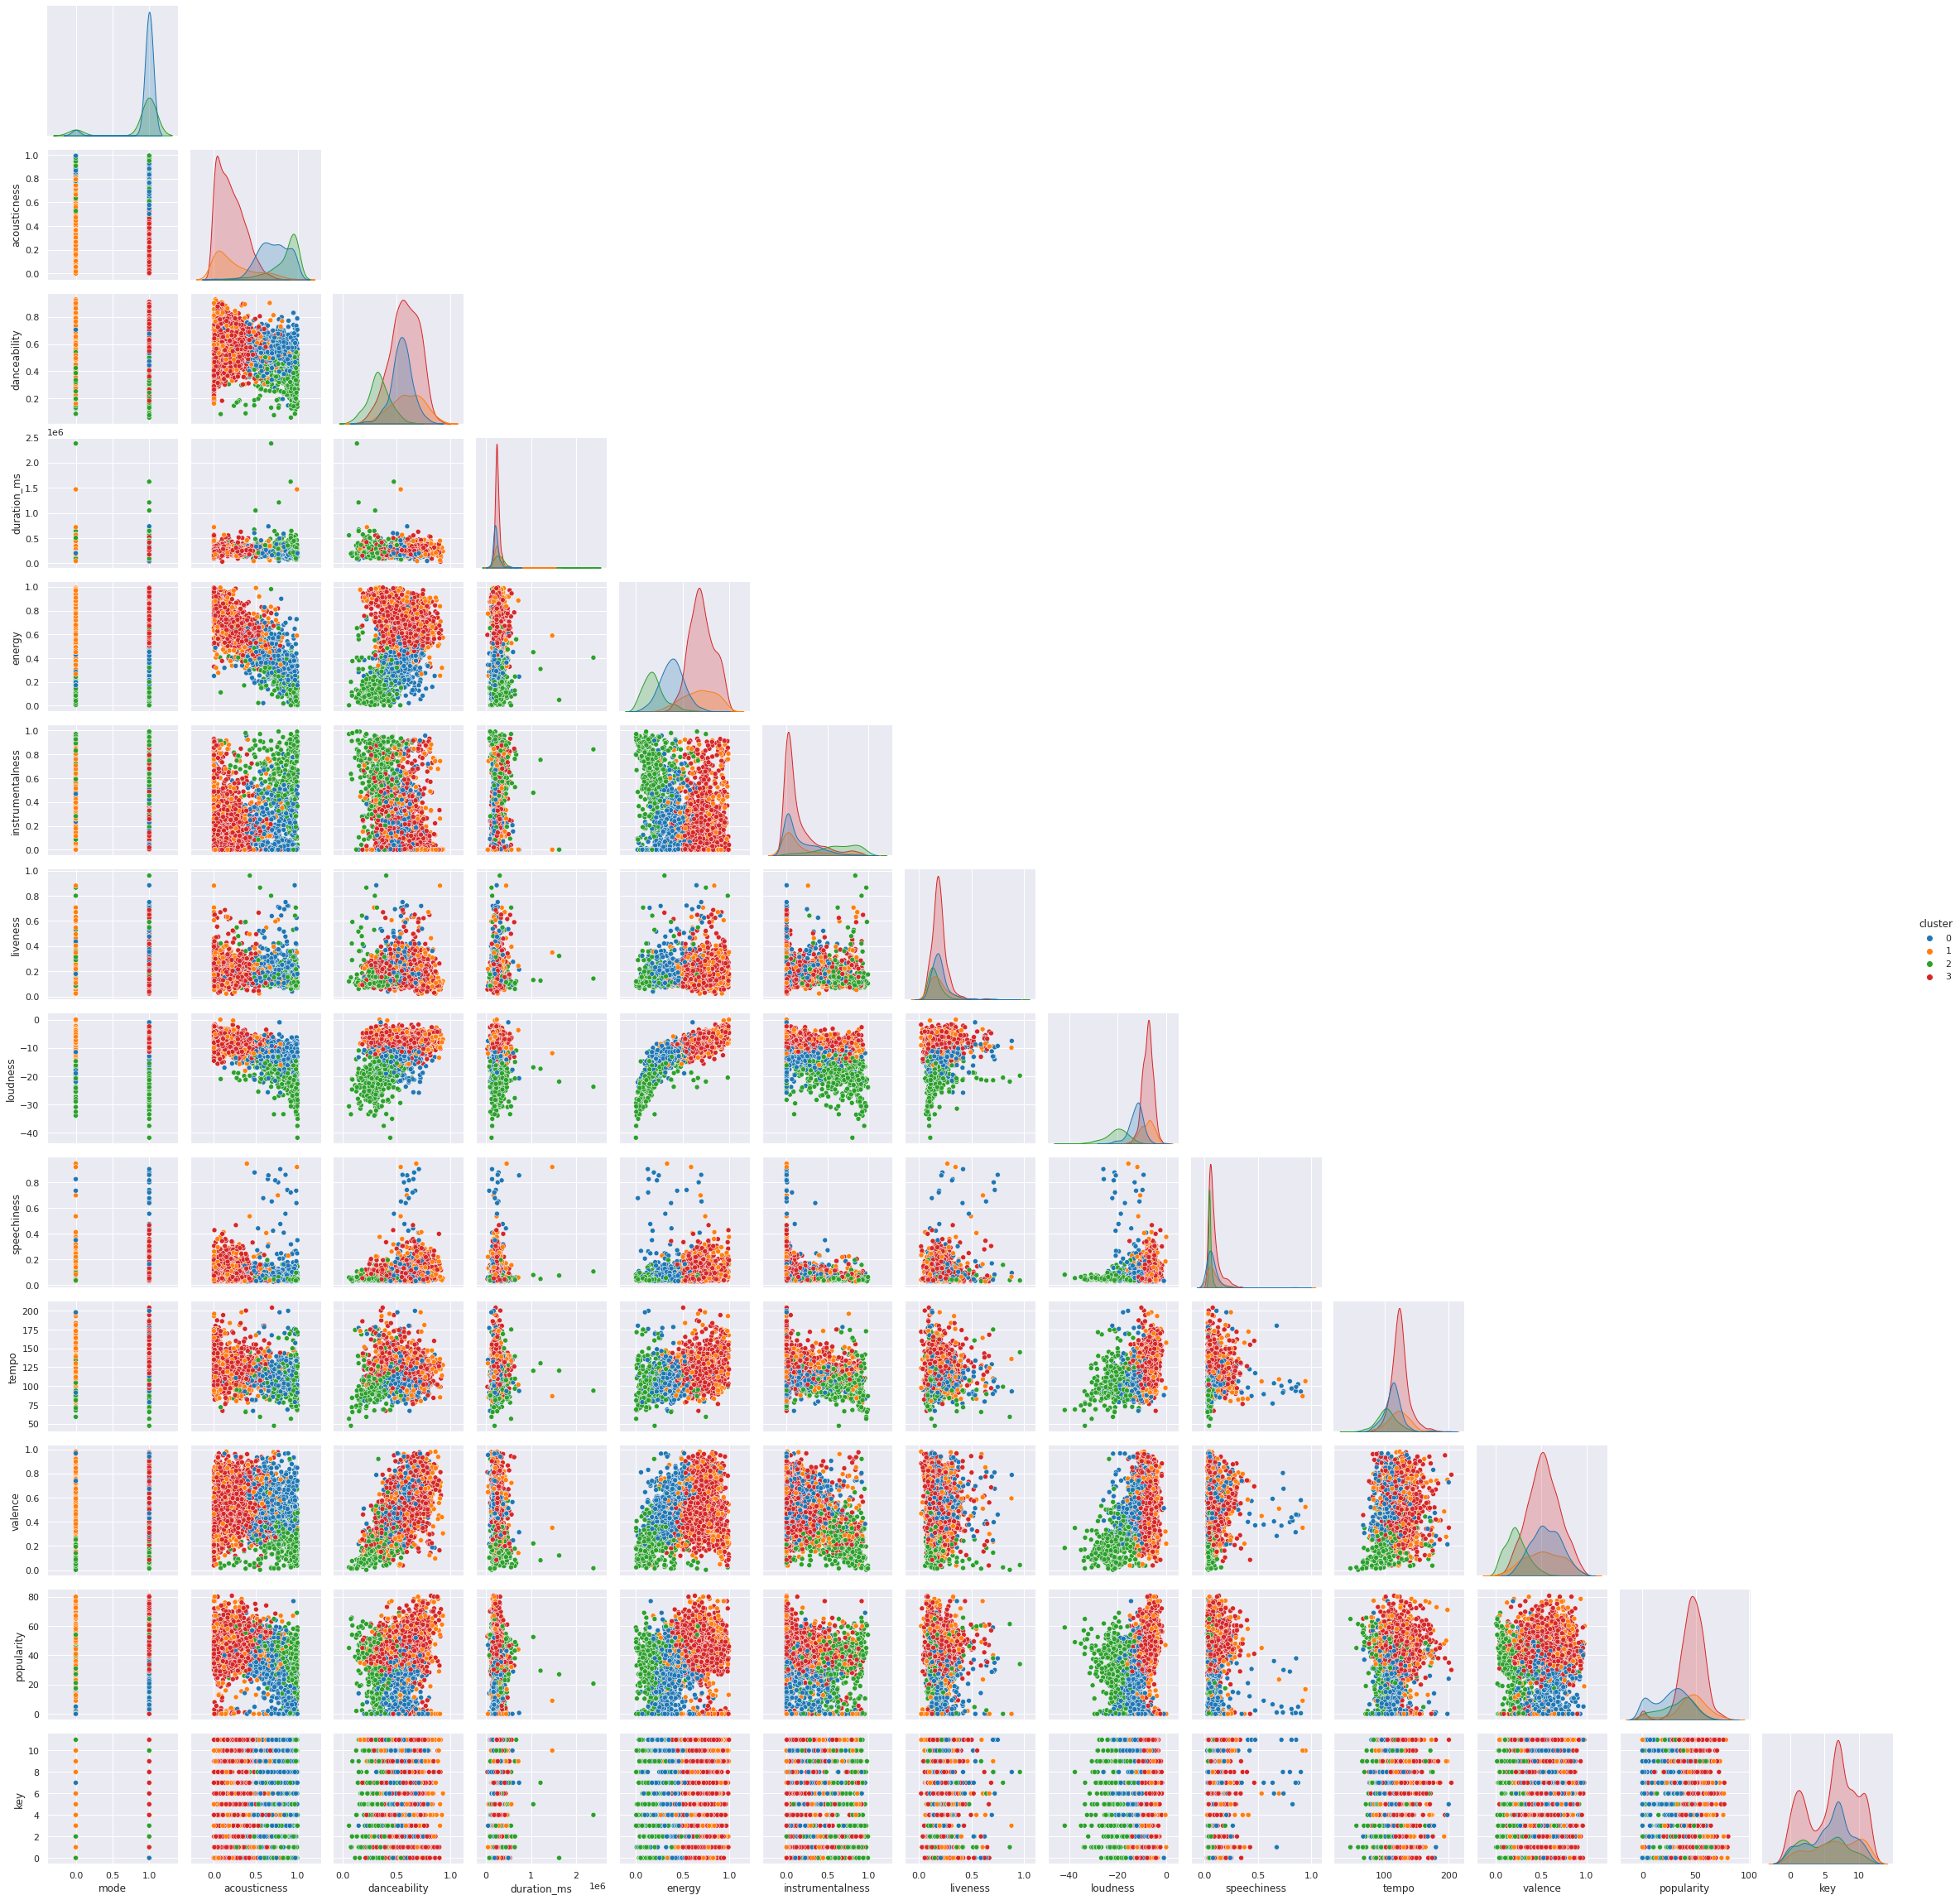

In [ ]:
sns.pairplot(df_model, hue='cluster', palette=sns.color_palette('tab10', 4), corner=True)

**To see how many records are in each cluster**

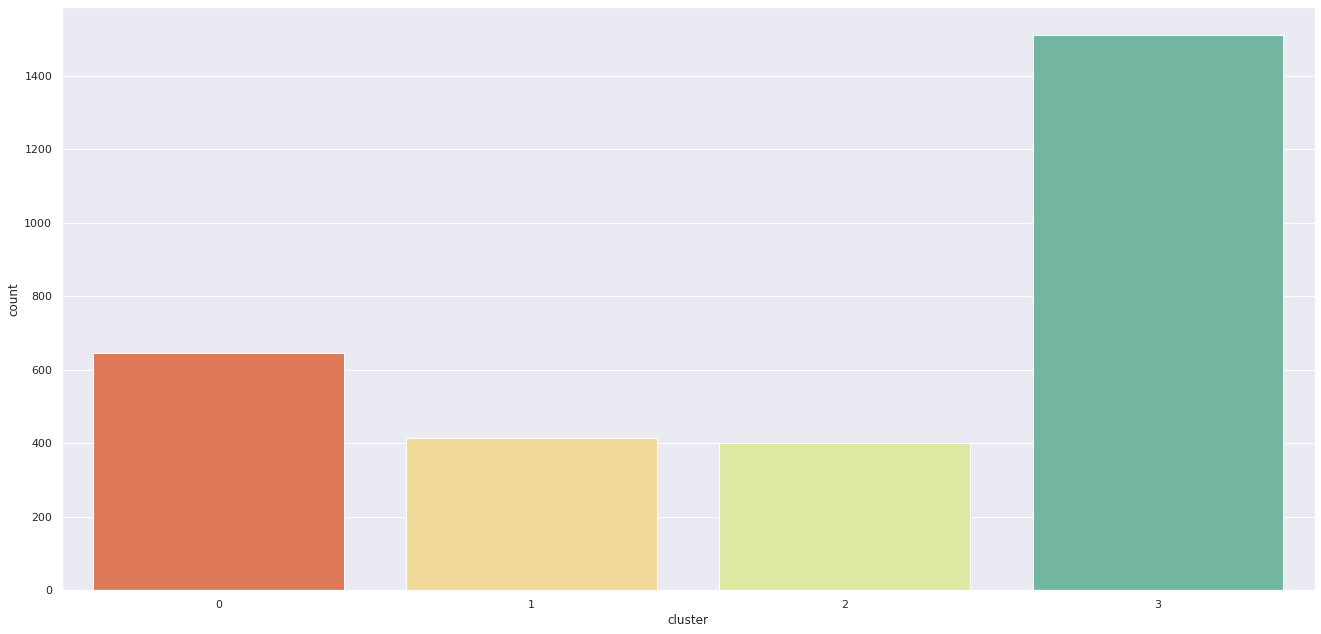

In [ ]:
#We can do this using a countplot

sns.countplot( x = 'cluster', data = df_model, palette = 'Spectral')

1. **Cluster #0:** Highest Acousticness
2. **Cluster #1:** Highest danceability, energy, loudness, speechiness, tempo, valence, and popularity.
3. **Cluster #2:** Highest acousicness, duration, and instrumentalness. Lowest danceability, loudness, and popularity.
4. **Cluster #3:** One of the higher danceability, valence, and loudness. Highest energy. Lowest acoustisness.

# **Extra - Genre_Recommender Function**

**In this section, we will implement the 'genre_recommender' function in two ways:**

**1. The function prints ordered genres within the same cluster**

**2. The function prints random genres within the same cluster**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Encode the genres as integer values
le = LabelEncoder()
df['genres_encoded'] = le.fit_transform(df['genres'])

# Extract the encoded genres column as a numpy array
X = df['genres_encoded'].values

# Fit a K-Means clustering model to the genres
kmeans = KMeans(n_clusters=4).fit(X.reshape(-1, 1))

# Define the genre recommender function
def genre_recommender(genre):
  # Encode the input genre as an integer value
  genre_encoded = le.transform([genre])[0]
  
  # Find the cluster that the input genre belongs to
  cluster = kmeans.predict(genre_encoded.reshape(1, -1))[0]
  
  # Find all the genres that belong to the same cluster as the input genre
  recommended_genres = df[kmeans.labels_ == cluster]['genres']
  
  # Print the first 5 recommended genres
  print(f'The genres similar to {genre} are:')
  i = 1
  for g in recommended_genres[:5]:
    print(i,')', g)
    i = i + 1

# Test the genre recommender function
genre_recommender('jazz')

The genres similar to jazz are:
1 ) italian techno
2 ) italian tenor
3 ) italian violin
4 ) italo dance
5 ) italo house


In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Encode the genres as integer values
le = LabelEncoder()
df['genres_encoded'] = le.fit_transform(df['genres'])

# Extract the encoded genres column as a numpy array
X = df['genres_encoded'].values

# Fit a K-Means clustering model to the genres
kmeans = KMeans(n_clusters=4).fit(X.reshape(-1, 1))

# Define the genre recommender function
def genre_recommender(genre):
  # Encode the input genre as an integer value
  genre_encoded = le.transform([genre])[0]
  
  # Find the cluster that the input genre belongs to
  cluster = kmeans.predict(genre_encoded.reshape(1, -1))[0]
  
  # Find all the genres that belong to the same cluster as the input genre
  recommended_genres = df[kmeans.labels_ == cluster]['genres'].values
  
  # Randomly sample 5 genres from the recommended genres
  recommended_genres_sample = random.sample(list(recommended_genres), 5)
  
  # Print the recommended genres
  print(f'The genres similar to {genre} are:')
  i = 1
  for g in recommended_genres_sample:
    print(i,')', g)
    i = i + 1

# Test the genre recommender function
genre_recommender('jazz')

The genres similar to jazz are:
1 ) leicester indie
2 ) organic ambient
3 ) jazz
4 ) nova canco
5 ) japanese emo
